In [45]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from my_utilities import read_data

In [46]:
# read the data
whole_data, tr_data, ts_data = read_data()

Check the p-value of the whole series, training data e test data to check if it's stationary

In [47]:
pvalue = adfuller(whole_data)[1]
print('p-value of the whole series: %f' % pvalue)
pvalue = adfuller(tr_data)[1]
print('p-value of the training data: %f' % pvalue)
pvalue = adfuller(ts_data)[1]
print('p-value of the test data: %f' % pvalue)

p-value of the whole series: 0.000000
p-value of the training data: 0.000000
p-value of the test data: 0.000000


To find the **AR order**, plot the **partial autocorrelation**

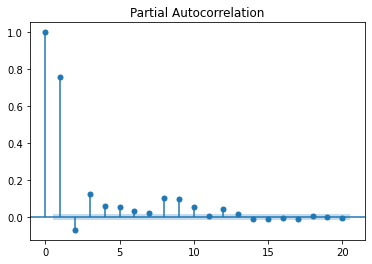

In [48]:
plot_pacf(tr_data, lags=20)
plt.show()

Set the AR order

In [49]:
ar_order = 5

To find the **MA order**, plot the **autocorrelation**

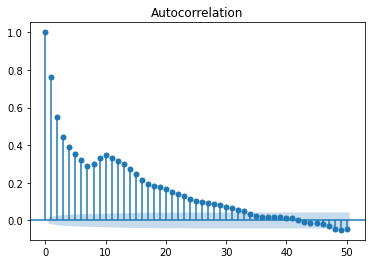

In [50]:
plot_acf(tr_data, lags=50)
plt.show()

Set the MA order

In [51]:
ma_order = 3

Create and fit an AR model, a MA one and an ARMA one

In [60]:
ar = ARIMA(endog=tr_data, order=(ar_order, 0, 0))
ma = ARIMA(endog=tr_data, order=(0, 0, ma_order))
arma = ARIMA(endog=tr_data, order=(ar_order, 0, ma_order))
res_ar = ar.fit()
res_ma = ma.fit()
res_arma = arma.fit()

Check the models' coefficients to see if there are irrelevant ones

In [64]:
print(f"AR model's coefficients: {res_ar.arparams}")
print(f"MA model's coefficients: {res_ma.maparams}")
print(f"ARMA model's AR coefficients: {res_arma.arparams}")
print(f"ARMA model's MA coefficients: {res_arma.maparams}")

AR model's coefficients: [ 0.81202175 -0.16319037  0.07975819  0.01541432  0.05563371]
MA model's coefficients: [0.83532467 0.48908294 0.21892564]
ARMA model's AR coefficients: [ 0.2622909   0.90451224 -0.08570204 -0.19385362  0.0527056 ]
ARMA model's MA coefficients: [ 0.53637449 -0.64691054 -0.45032385]


Make predictions with retraining

In [ ]:
err = 0
predictions = []
for i in tqdm(range(100)):
    predictions.append(res.forecast(steps=1))
    curr_err = abs(predictions[-1] - ts_data[i])
    err += curr_err
    tr_data = np.concatenate((tr_data, [ts_data[i]]))
    model = ARIMA(endog=tr_data, order=(ar_order, 0, 0))
    res = model.fit()

In [ ]:
err /= len(ts_data)
print("Average error: ", err)
plt.plot(ts_data[:100], label="Test data")
plt.plot(predictions, label="Predictions")
plt.legend()
plt.show()
